In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from logging import error
data=pd.read_csv('password.csv', on_bad_lines='skip',nrows=12000)

In [ ]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
data.shape

(12000, 2)

<Axes: xlabel='strength', ylabel='count'>

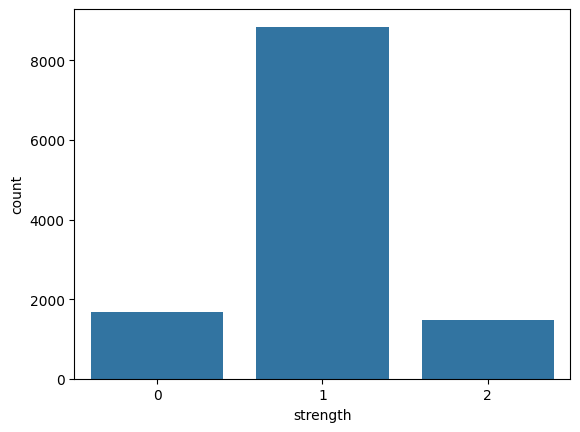

In [ ]:
sns.countplot(x='strength', data=data)

In [ ]:
data.isna().sum()

,0
password,0
strength,0


In [ ]:
x=data.iloc[:,0].values
y=data.iloc[:,1].values

In [ ]:
def word_to_char(input):
  character=[]
  for i in input:
    character.append(i)
  return character

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_to_char)
x=vectorizer.fit_transform(x)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 80606 stored elements and shape (9600, 72)>

In [ ]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20209 stored elements and shape (2400, 72)>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)

<Axes: >

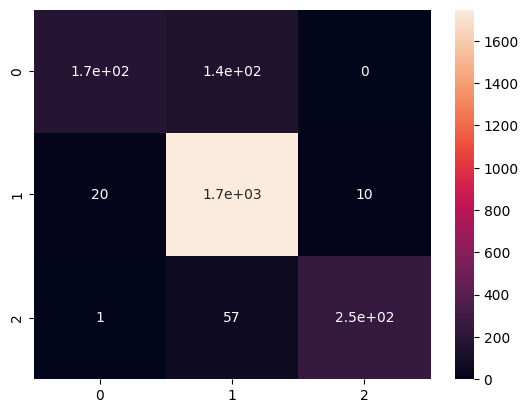

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
accuracy_score(y_test,y_pred)

0.90375

In [ ]:
text=np.array(['pA#9s$z!qR7gH*vB6k'])
model.predict(vectorizer.transform(text))

array([2])

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))